#### Importing all the necessary libraries



In [0]:
%tensorflow_version 1.x
import numpy as np
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
#from tensorflow.keras import 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import time

####  Listing all files and directories present in the specified directory

In [0]:
dataset = os.listdir("/content/drive/My Drive/Artificial Intelligence/Data/")

In [3]:
dataset

['full_numpy_bitmap_apple.npy',
 'full_numpy_bitmap_bowtie.npy',
 'full_numpy_bitmap_candle.npy',
 'full_numpy_bitmap_door.npy',
 'full_numpy_bitmap_envelope.npy',
 'full_numpy_bitmap_fish.npy',
 'full_numpy_bitmap_guitar.npy',
 'full_numpy_bitmap_ice cream.npy',
 'full_numpy_bitmap_lightning.npy',
 'full_numpy_bitmap_moon.npy',
 'full_numpy_bitmap_mountain.npy',
 'full_numpy_bitmap_star.npy',
 'full_numpy_bitmap_tent.npy',
 'full_numpy_bitmap_toothbrush.npy',
 'full_numpy_bitmap_wristwatch.npy']

#### Creating an empty list to store the data

In [0]:
data=[]
feature = []
x = []
label = []

In [0]:
def load_data():
    count = 0
    for file in dataset:
        file = "/content/drive/My Drive/Artificial Intelligence/Data/" + file
        # Load arrays from .npy files
        data = np.load(file)
        # Casting the int numpy.ndarray to float numpy.ndarray
        # Dividing it by 255 helps to get the RGB color
        data = data.astype('float32') / 255.
        # Extracting top 10000 rows and all columns
        data = data[0:10000, :]
        # Storing the extracted data from each file as feature
        feature.append(data)
        x = [count for _ in range(10000)]
        count += 1
        x = np.array(x).astype('float32')
        # Reshaping the list to a single row 
        x = x.reshape(x.shape[0], 1)
        # Loading teh created data as label
        label.append(x)

    return feature, label

Storing the loaded feature and label of each file as features and labels

In [0]:
features, labels = load_data()

Casting the features and labels to float

In [0]:
features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

#### Reshaping labels and features

In [0]:
features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])

In [9]:
features.shape

(150000, 784)

In [10]:
labels.shape

(150000, 1)

#### To store the python objects as  byte stream

In [0]:
with open("features", "wb") as f:
    pickle.dump(features, f, protocol=4)
with open("labels", "wb") as f:
    pickle.dump(labels, f, protocol=4)

In [0]:
def keras_model(image_x, image_y):
    num_of_classes = 15
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "QuickDraw.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [0]:
def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

In [0]:
def augmentData(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

In [0]:
def prepress_labels(labels):
    labels = np_utils.to_categorical(labels)
    return labels

In [0]:
features, labels = loadFromPickle()

In [0]:
features, labels = shuffle(features, labels)

In [0]:
labels=prepress_labels(labels)

In [0]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,test_size=0.1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [20]:
model, callbacks_list = keras_model(28,28)
print_summary(model)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800   

In [23]:
t1 = time.time()
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=64,
callbacks=[TensorBoard(log_dir="QuickDraw")])
print(time.time() - t1)
model.save('QuickDraw.h5')

Train on 135000 samples, validate on 15000 samples
Epoch 1/3
135000/135000 [==============================] - 34s 249us/step - loss: 0.3482 - acc: 0.9065 - val_loss: 0.2570 - val_acc: 0.9288
Epoch 2/3
135000/135000 [==============================] - 34s 249us/step - loss: 0.2946 - acc: 0.9219 - val_loss: 0.2444 - val_acc: 0.9307
Epoch 3/3
135000/135000 [==============================] - 33s 245us/step - loss: 0.2637 - acc: 0.9289 - val_loss: 0.2403 - val_acc: 0.9348
100.41230726242065


In [0]:
score = model.evaluate(test_x, test_y, verbose=0)

In [25]:
score

[0.24029617153505484, 0.9348]

In [0]:
pred_y = model.predict(test_x)

In [34]:
test_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test_labels = np.argmax(test_y, axis=1)

In [36]:
y_test_labels

array([14,  7, 11, ...,  7, 12, 10])

In [30]:
pred_y

array([[2.5061885e-02, 6.2014576e-02, 2.5316304e-02, ..., 1.7570507e-02,
        8.2752235e-02, 3.7670061e-01],
       [9.4490033e-18, 3.3035684e-12, 7.0308592e-13, ..., 1.2752712e-18,
        1.6873249e-14, 2.6353845e-14],
       [3.5870132e-10, 3.2076554e-07, 9.7344528e-11, ..., 1.7585699e-06,
        1.7094895e-10, 3.6272218e-07],
       ...,
       [1.2107124e-13, 3.8942463e-09, 3.2966035e-10, ..., 3.9708617e-14,
        2.9422208e-11, 1.9226820e-11],
       [3.8123180e-09, 4.4635023e-08, 1.5825236e-08, ..., 9.9887949e-01,
        9.5868039e-08, 1.3806570e-08],
       [1.5285250e-08, 3.5947588e-07, 2.2460590e-07, ..., 6.8379022e-02,
        2.6654238e-06, 8.0743270e-09]], dtype=float32)

In [0]:
y_pred_labels = np.argmax(pred_y, axis=1)

In [38]:
y_pred_labels

array([14,  7, 11, ...,  7, 12, 10])

In [0]:
con = metrics.confusion_matrix(y_test_labels,y_pred_labels)

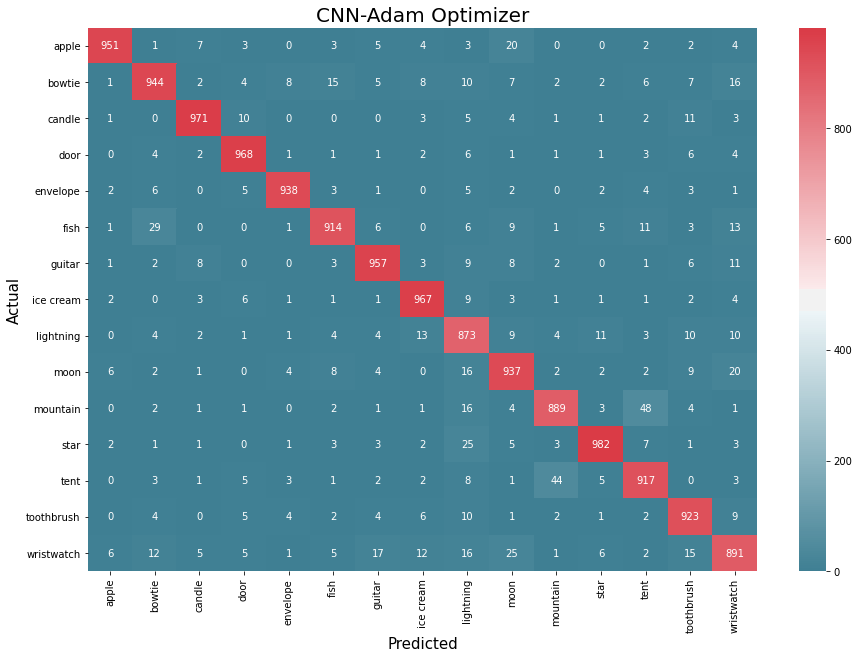

In [43]:
#con = metrics.confusion_matrix(test_y,pred_y)
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
labels=[i.split('.')[0].split('_')[-1] for i in dataset] ## list comprehension
df_con = cm2df(con, labels)
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_con, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title('CNN-Adam Optimizer',size=20)
#plt.show()
plt.savefig('CNNAdam_CM')

#### SVM Implementation

In [0]:
data=[]
feature = []
x = []
label = []
def load_data():
    count = 0
    for file in dataset:
        file = "/content/drive/My Drive/Artificial Intelligence/Data/" + file
        # Load arrays from .npy files
        data = np.load(file)
        # Casting the int numpy.ndarray to float numpy.ndarray
        # Dividing it by 255 helps to get the RGB color
        data = data.astype('float32') / 255.
        # Extracting top 10000 rows and all columns
        data = data[0:10000, :]
        # Storing the extracted data from each file as feature
        feature.append(data)
        x = [count for _ in range(10000)]
        count += 1
        x = np.array(x).astype('float32')
        # Reshaping the list to a single row 
        x = x.reshape(x.shape[0], 1)
        # Loading the created data as label
        label.append(x)

    return feature, label

In [0]:
features, labels = load_data()

In [0]:
features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

In [0]:
features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=0,test_size=0.5)

In [0]:
clf = SVC(kernel='rbf')

In [50]:
t1 = time.time()
clf.fit(x_train,y_train)
print(time.time() - t1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2890.0483858585358


In [51]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8909066666666666


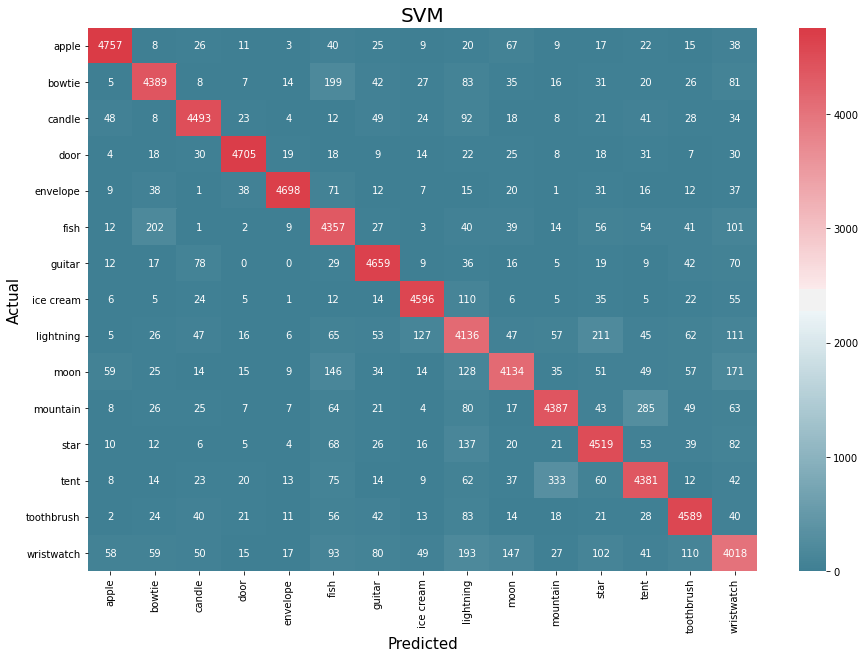

In [55]:
con = metrics.confusion_matrix(y_test,y_pred)
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
labels=[i.split('.')[0].split('_')[-1] for i in dataset] ## list comprehension
df_con = cm2df(con, labels)
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_con, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title('SVM',size=20)
#plt.show()
plt.savefig('SVM_CM')

### Logistic Regression Implementation

In [0]:
data=[]
feature = []
x = []
label = []
def load_data():
    count = 0
    for file in dataset:
        file = "/content/drive/My Drive/Artificial Intelligence/Data/" + file
        # Load arrays from .npy files
        data = np.load(file)
        # Casting the int numpy.ndarray to float numpy.ndarray
        # Dividing it by 255 helps to get the RGB color
        data = data.astype('float32') / 255.
        # Extracting top 10000 rows and all columns
        data = data[0:10000, :]
        # Storing the extracted data from each file as feature
        feature.append(data)
        x = [count for _ in range(10000)]
        count += 1
        x = np.array(x).astype('float32')
        # Reshaping the list to a single row 
        x = x.reshape(x.shape[0], 1)
        # Loading teh created data as label
        label.append(x)

    return feature, label

In [0]:
features, labels = load_data()

In [0]:
features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

In [7]:
features.shape

(15, 10000, 784)

In [8]:
labels.shape

(15, 10000, 1)

In [0]:
features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])

In [10]:
features.shape

(150000, 784)

In [11]:
labels.shape

(150000, 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=0,test_size=0.1)

In [13]:
x_train.shape

(135000, 784)

In [14]:
x_test.shape

(15000, 784)

In [0]:
clf = LogisticRegression(solver = 'lbfgs' , multi_class= 'multinomial', max_iter=100)

In [16]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7562666666666666


In [33]:
y_test.shape

(15000, 1)

In [34]:
y_pred.shape

(15000,)

## Create dataset to view Actual and Predicted values in a table

In [0]:
df=pd.DataFrame({'Actual': temp_test[0], 'Predicted': y_pred})

In [44]:
df

,Actual,Predicted
0,1.0,1.0
1,14.0,14.0
2,7.0,7.0
3,0.0,0.0
4,8.0,8.0
...,...,...
14995,12.0,12.0
14996,5.0,5.0
14997,9.0,9.0
14998,6.0,6.0


## Create Confusion Matrix

In [0]:
con = metrics.confusion_matrix(y_test,y_pred)

#### Converting Confusion Matrix to Pandas Dataframe
#### This is done to add labels to rows and columns

In [0]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

#### Extracting labels from the paths in dataset

In [0]:
labels=[i.split('.')[0].split('_')[-1] for i in dataset] ## list comprehension

In [82]:
labels

['apple',
 'bowtie',
 'candle',
 'door',
 'envelope',
 'fish',
 'guitar',
 'ice cream',
 'lightning',
 'moon',
 'mountain',
 'star',
 'tent',
 'toothbrush',
 'wristwatch']

In [0]:
df_con = cm2df(con, labels)

In [84]:
df_con

,apple,bowtie,candle,door,envelope,fish,guitar,ice cream,lightning,moon,mountain,star,tent,toothbrush,wristwatch
apple,888,2,13,6,4,10,16,1,3,31,6,8,10,9,20
bowtie,1,763,1,2,26,67,19,9,14,2,4,9,8,25,17
candle,18,0,845,1,1,2,19,10,26,17,6,5,5,6,12
door,2,2,7,866,4,5,4,12,6,18,3,4,8,12,8
envelope,2,28,0,12,868,38,7,2,2,3,3,11,7,1,16
fish,2,71,1,2,18,729,14,0,6,9,7,21,22,29,26
guitar,2,18,47,3,5,7,758,0,34,6,6,10,8,11,70
ice cream,4,0,14,9,2,4,5,822,54,5,0,10,1,17,9
lightning,2,5,47,28,5,9,18,87,608,24,28,49,24,64,19
moon,36,11,16,33,13,39,21,12,46,662,8,15,29,24,37


In [1]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_con, cmap=cmap, annot=True, fmt='d')
plt.xlabel('Predicted',size =15)
plt.ylabel('Actual', size =15)
plt.title('Logistic Regression')
#plt.show()
plt.savefig('Logistic_CM')

NameError: ignored